In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
df_titanic=pd.read_csv('C:\\Users\\admin\\Downloads\\titanic_dataset.csv')

In [251]:
"""PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict."""

"PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.\nHomePlanet - The planet the passenger departed from, typically their planet of permanent residence.\nCryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.\nCabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.\nDestination - The planet the passenger will be debarking to.\nAge - The age of the passenger.\nVIP - Whether the passenger has paid for special VIP service during the voyage.\nRoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.\nName - The first and

In [466]:
df_titanic.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [253]:
df_titanic.tail()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False
12966,4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
12967,4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,False
12968,4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False
12969,4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,False


In [5]:
df=df_titanic.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [467]:
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [468]:
df.shape

(12970, 15)

In [469]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [470]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [262]:
df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [263]:
df['Transported'].unique()

array([False,  True])

In [264]:
df['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

In [6]:
df = df.drop([ 'Name'], axis=1)


In [7]:
df.drop(labels=[df.columns[0]],axis=1,inplace=True)

In [8]:
numeric_columnss=[	'Age',		'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck'	]

In [9]:
categorical_columnss=['HomePlanet','Destination','VIP','CryoSleep']

In [10]:
df.columns[df.isnull().any()]######hangilerinde null var ona baktim

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [11]:
df.isnull().sum().sort_values(ascending=False)

CryoSleep       310
ShoppingMall    306
Cabin           299
VIP             296
FoodCourt       289
HomePlanet      288
Spa             284
Destination     274
Age             270
VRDeck          268
RoomService     263
PassengerId       0
Transported       0
dtype: int64

In [12]:
missing_percentage=df.isnull().mean()*100
#Filter columns with missing values
missing_percentage

PassengerId     0.000000
HomePlanet      2.220509
CryoSleep       2.390131
Cabin           2.305320
Destination     2.112567
Age             2.081727
VIP             2.282190
RoomService     2.027756
FoodCourt       2.228219
ShoppingMall    2.359291
Spa             2.189668
VRDeck          2.066307
Transported     0.000000
dtype: float64

<Axes: >

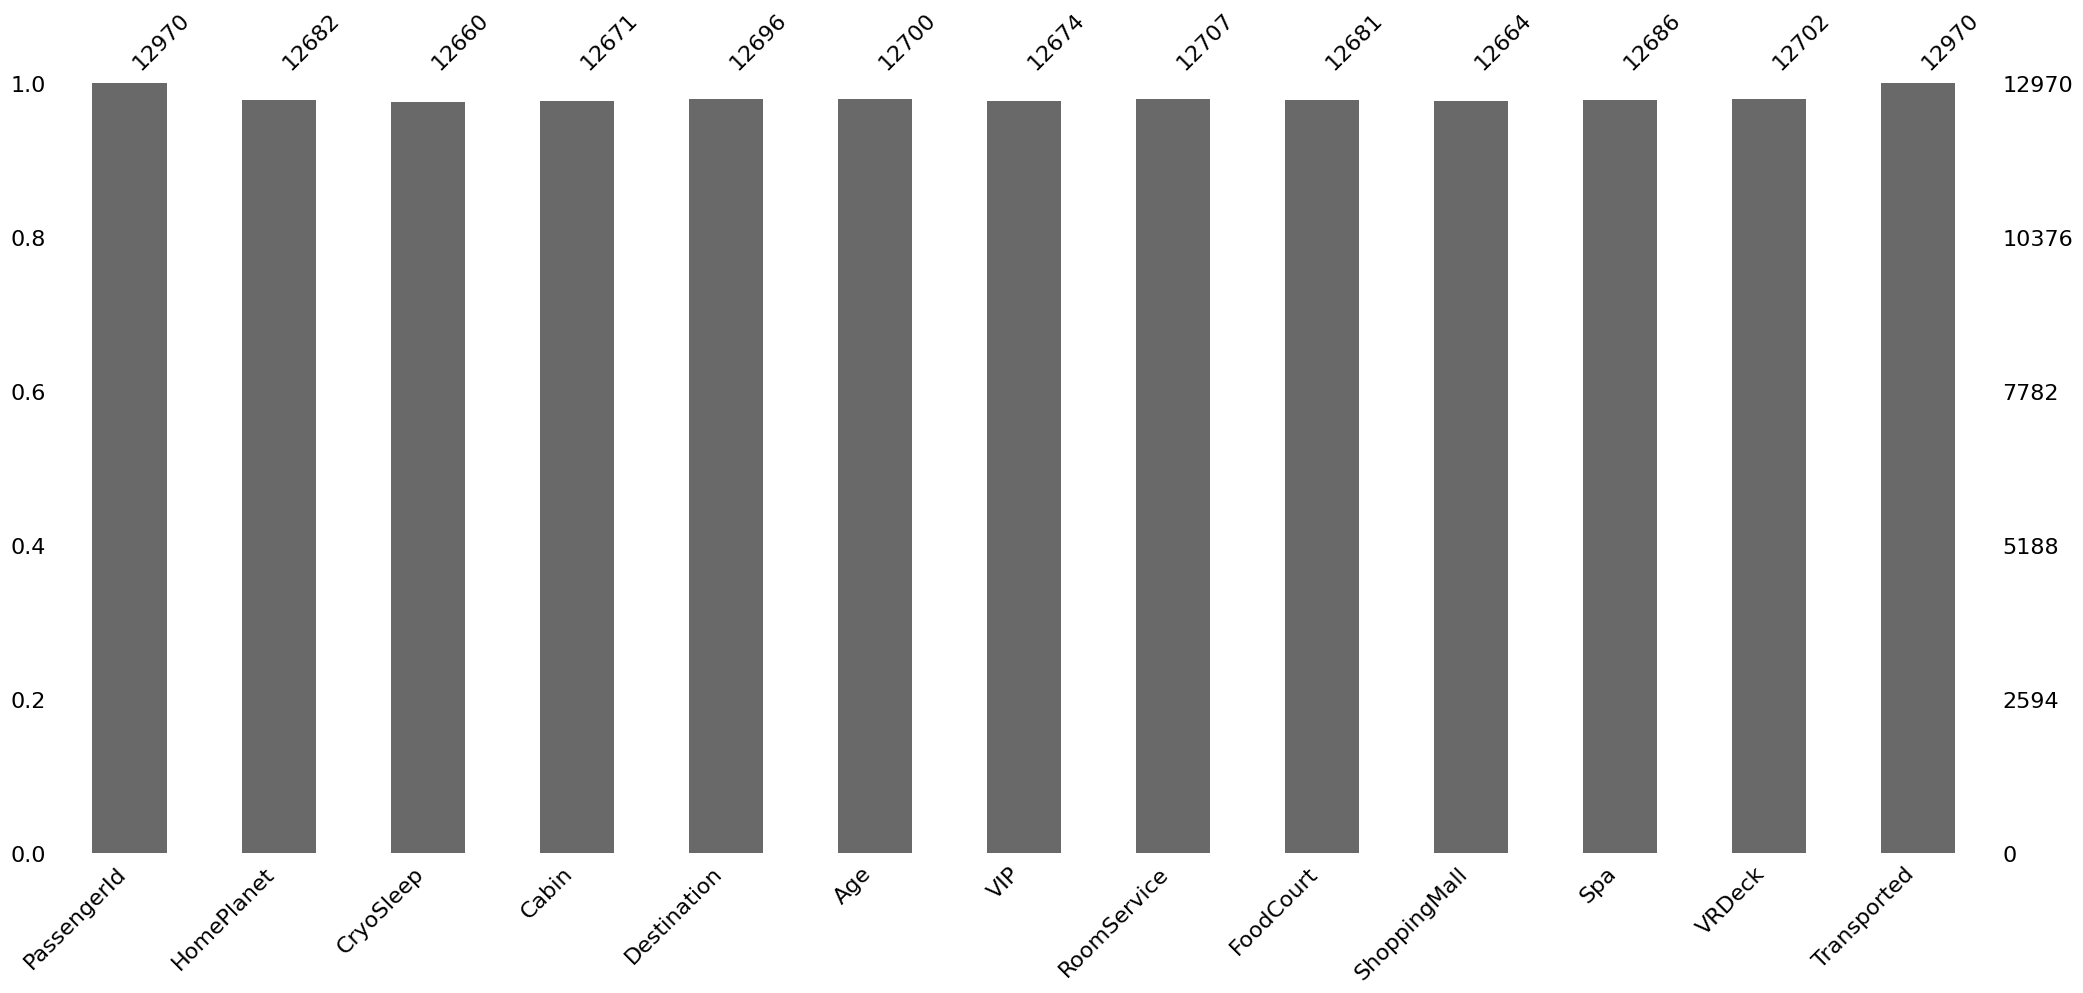

In [13]:
import missingno as msno
msno.bar(df)

In [479]:
columns_with_missing_values=missing_percentage[missing_percentage>0]
for column,percentage in columns_with_missing_values.iteritems():
 print(f"{column}: {percentage:.2f}%")


HomePlanet: 2.22%
CryoSleep: 2.39%
Cabin: 2.31%
Destination: 2.11%
Age: 2.08%
VIP: 2.28%
RoomService: 2.03%
FoodCourt: 2.23%
ShoppingMall: 2.36%
Spa: 2.19%
VRDeck: 2.07%


C:\Users\admin\AppData\Local\Temp\ipykernel_21200\2523147706.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column,percentage in columns_with_missing_values.iteritems():


In [480]:
duplicates=df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported]
Index: []


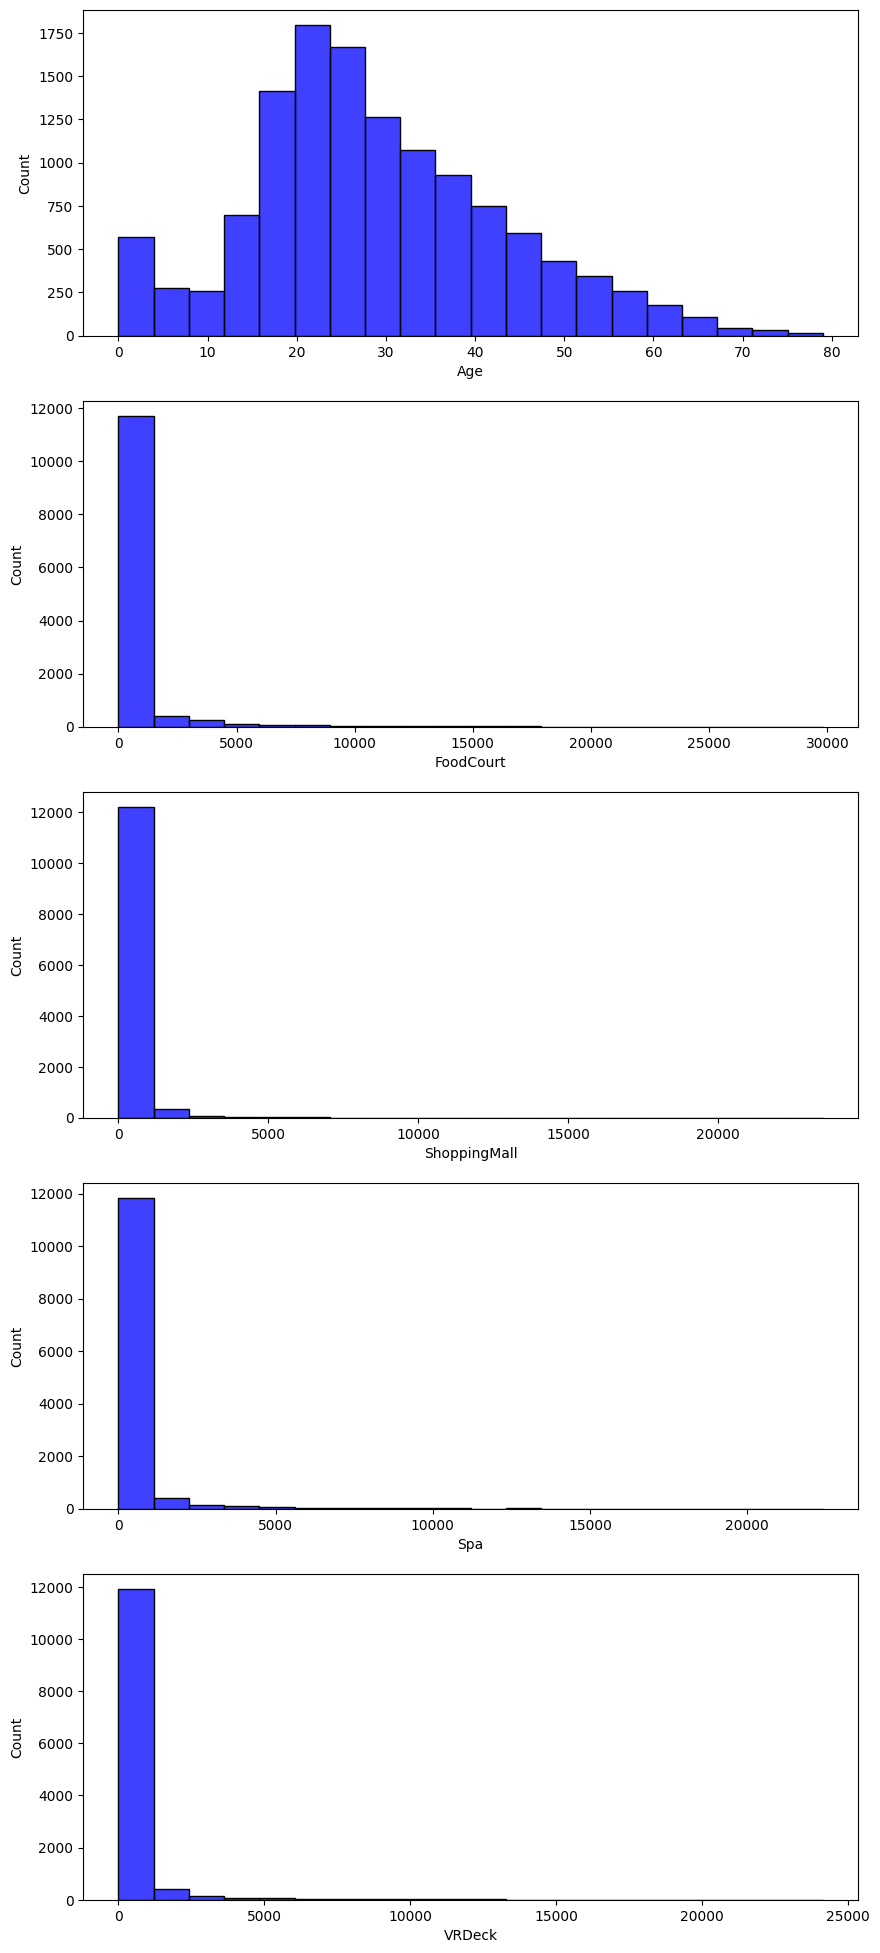

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(top=2)

columns = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i, column in enumerate(columns):
    sns.histplot(df[column], color='b', bins=20, ax=ax[i])

plt.show()


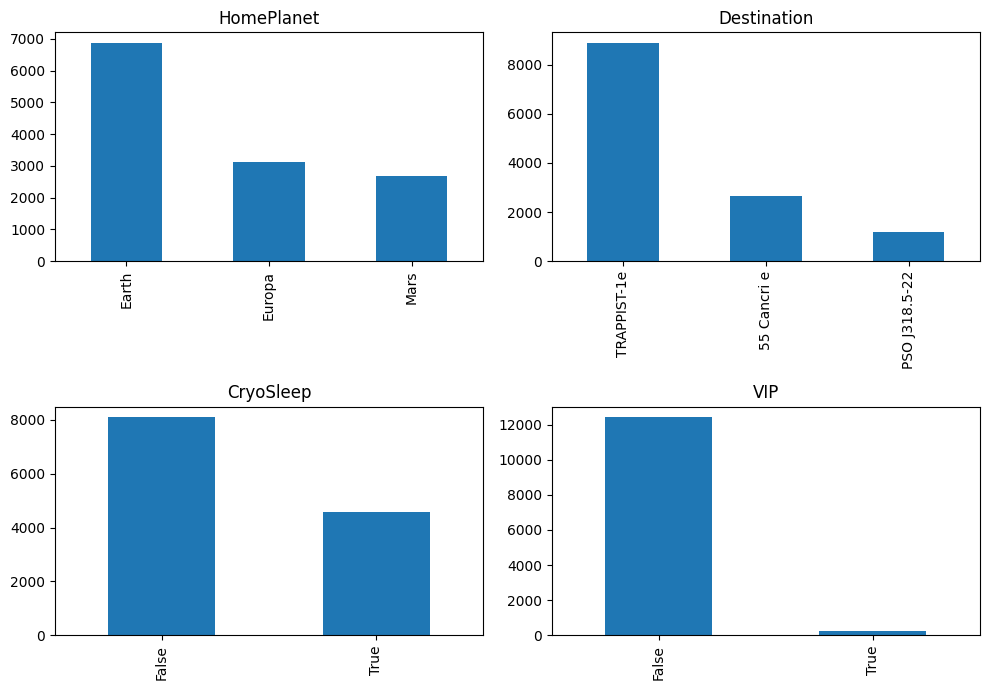

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

df['HomePlanet'].value_counts().plot(kind='bar', ax=axes[0, 0], title='HomePlanet')
df['Destination'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Destination')
df['CryoSleep'].value_counts().plot(kind='bar', ax=axes[1, 0], title='CryoSleep')
df['VIP'].value_counts().plot(kind='bar', ax=axes[1, 1], title='VIP')

plt.tight_layout()
plt.show()


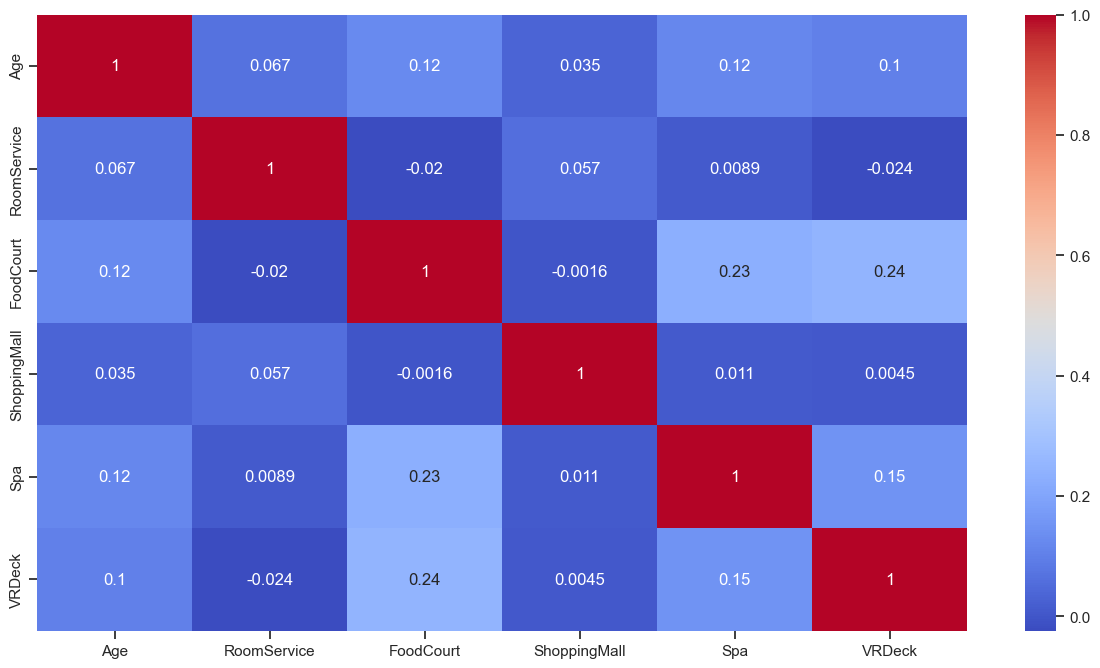

In [481]:

#num_corr=numeric_columnss.corr()
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
numeric_df = df[numeric_columns]

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)

# Grafiği göster
plt.show()


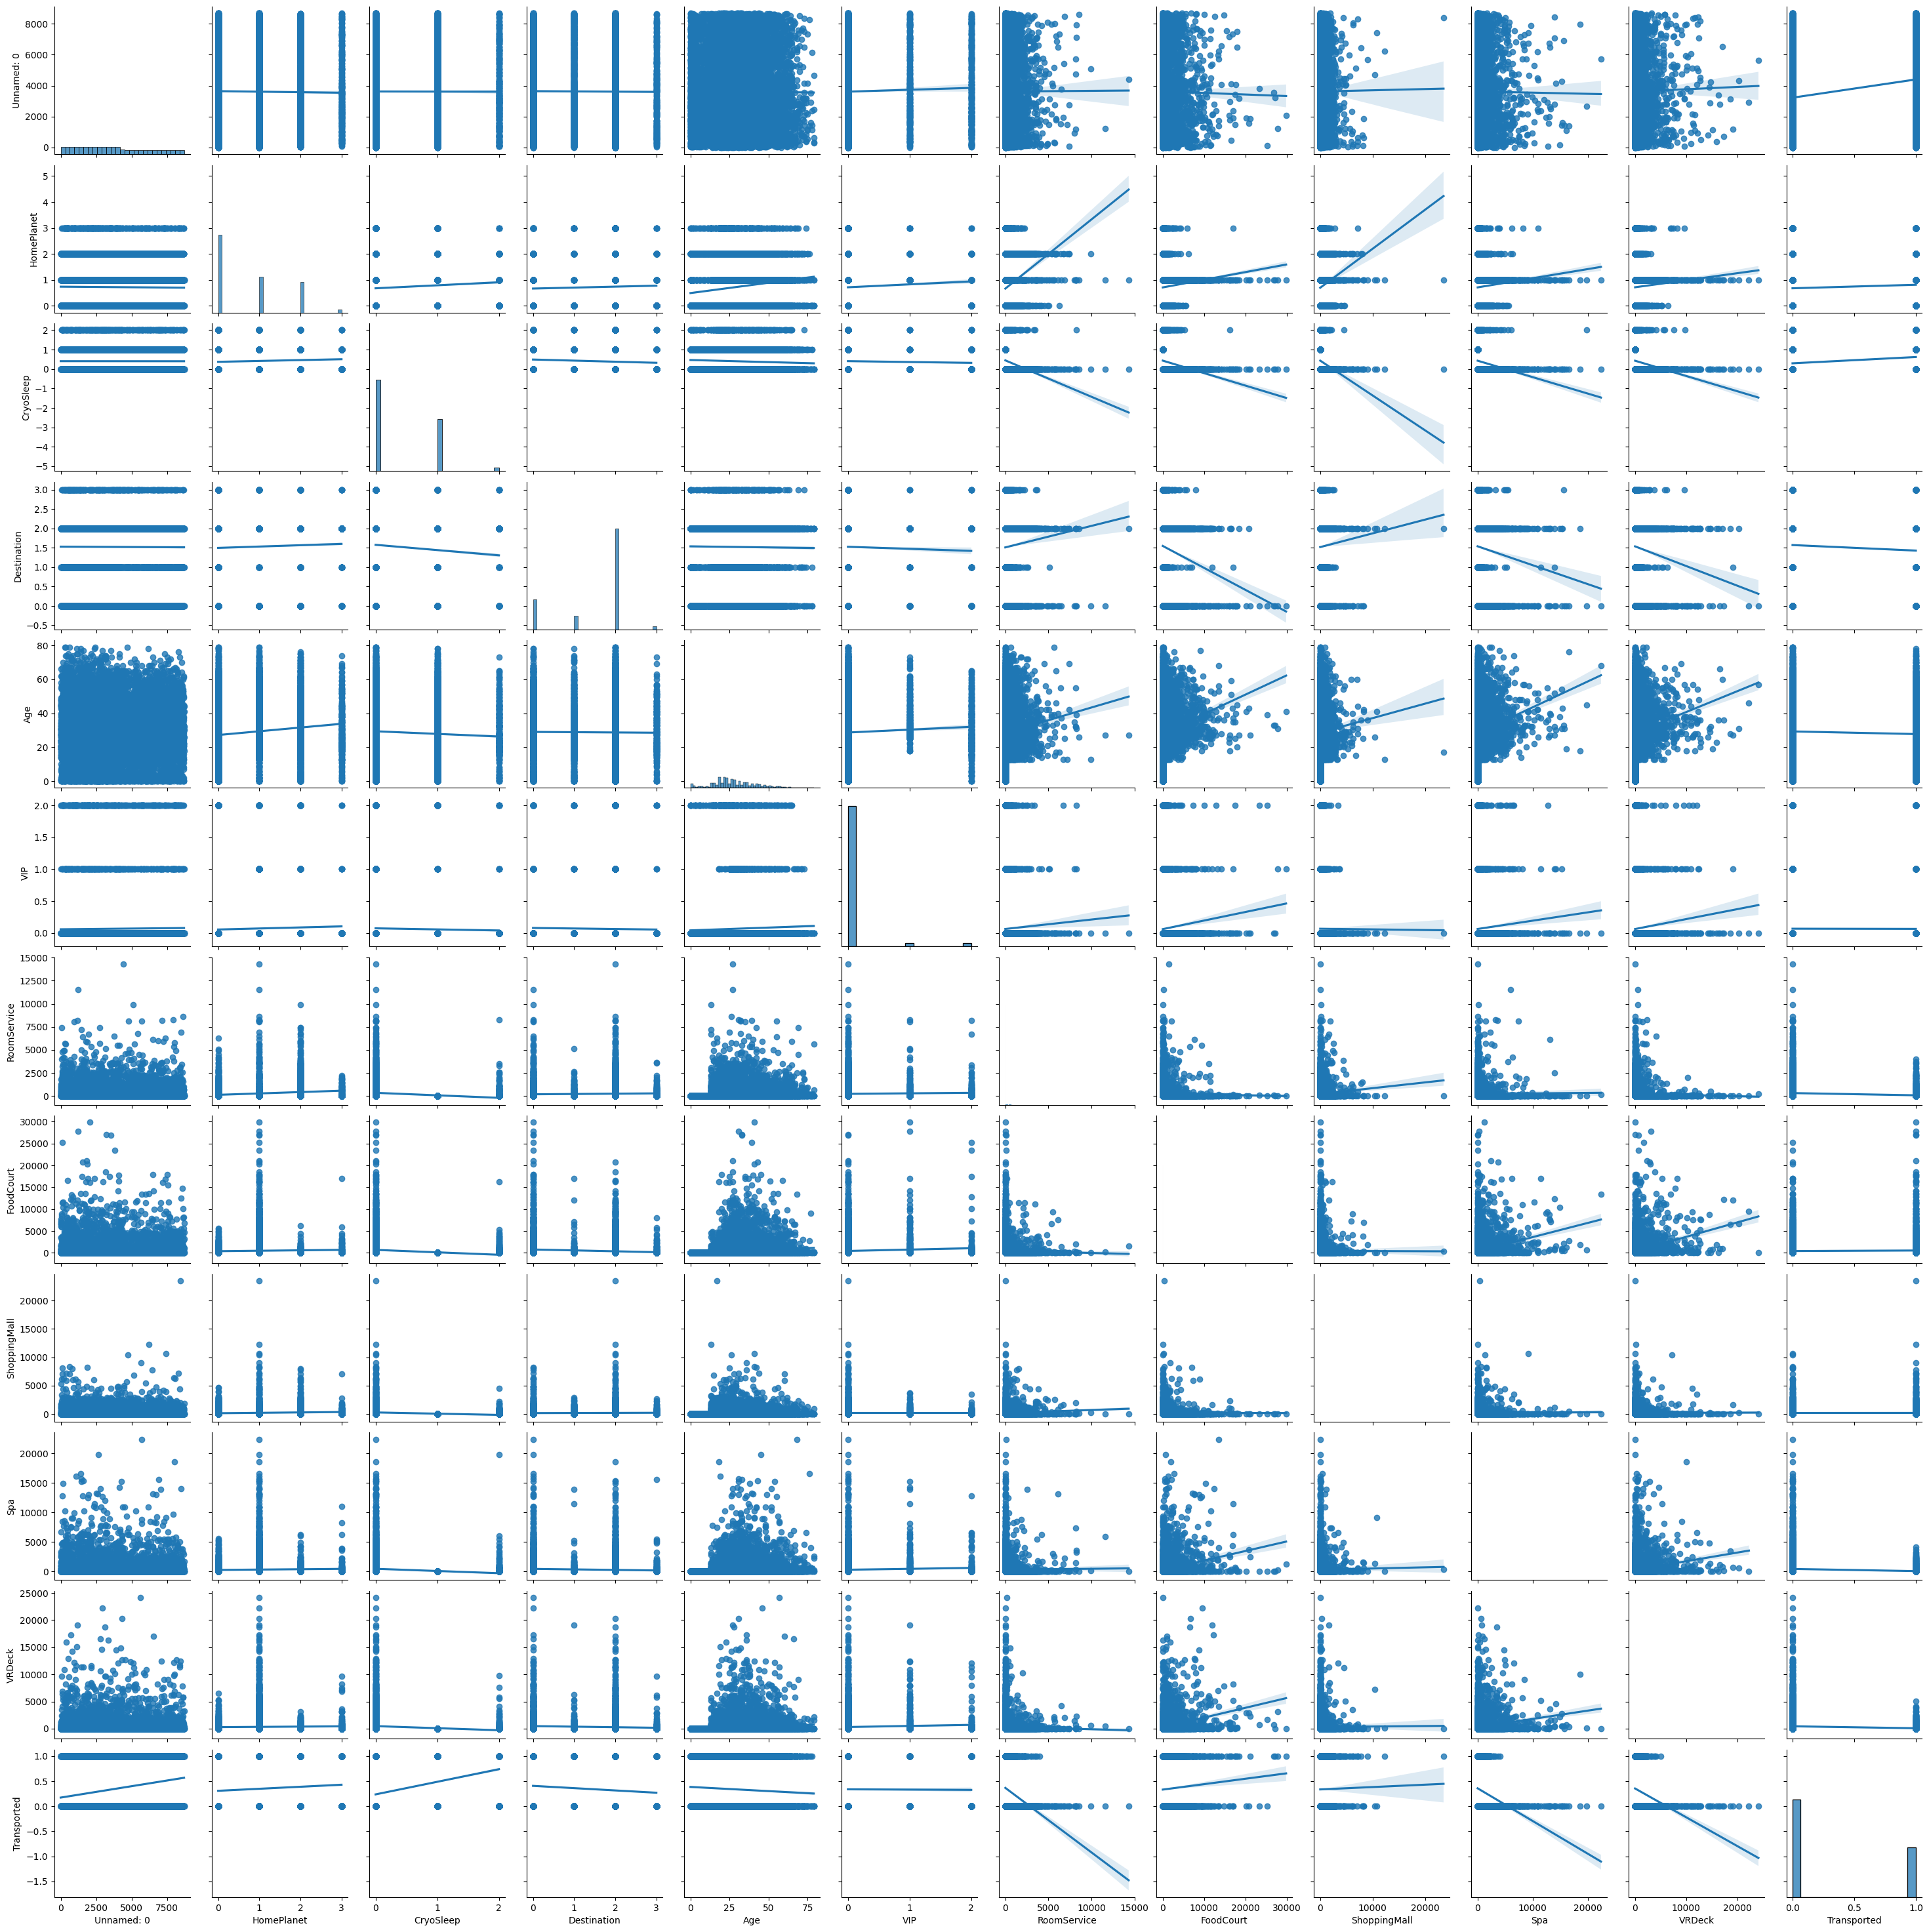

In [312]:
import seaborn as sb
sb.pairplot(df,kind='reg');

In [16]:
categorical_columnss=['HomePlanet','Destination','VIP','CryoSleep']
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='most_frequent')
df[categorical_columnss]=imputer.fit_transform(df[categorical_columnss])

In [17]:
df[categorical_columnss].isnull().sum()
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           299
Destination       0
Age             270
VIP               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Transported       0
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)
df=df.drop(['Cabin'],axis=1)


In [21]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

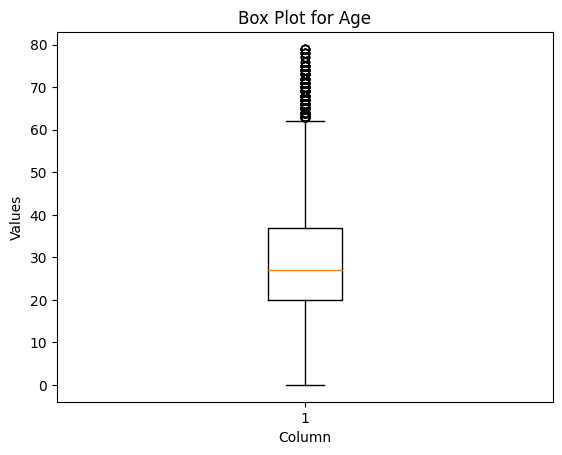

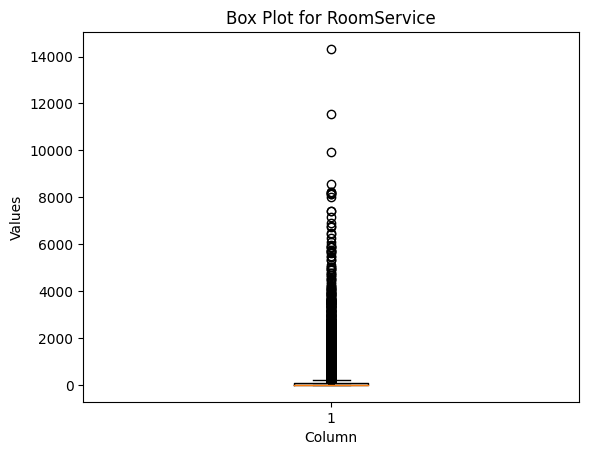

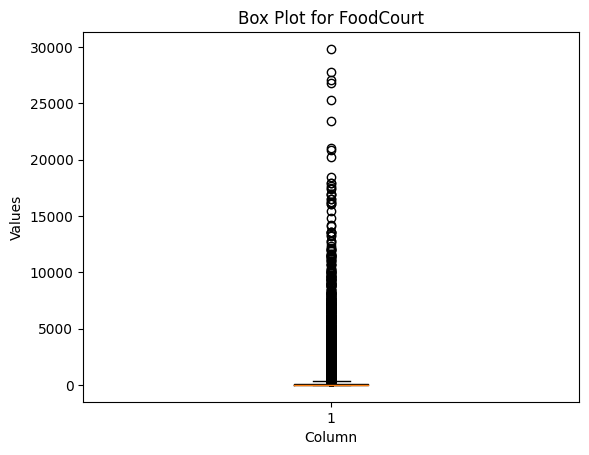

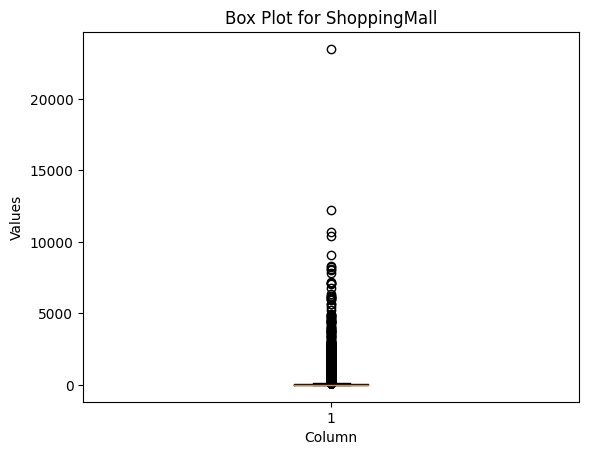

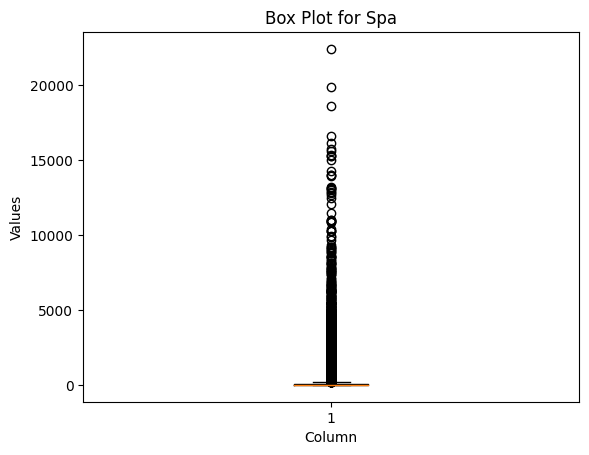

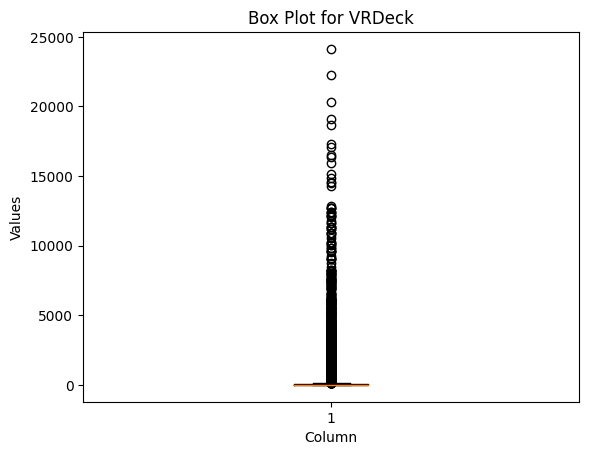

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

"""sns.set(style="ticks")

plt.figure(figsize=(12, 8))

for column in df.columns:
    plt.figure()
    sns.boxplot(data=df[column])

    plt.xlabel('Values')
    plt.ylabel(column)
    plt.title(f'Box Plot for {column}')"""

plt.show()
for column in numeric_columnss:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [24]:
df2=df.copy()

In [ ]:
"""z_scores=pd.DataFrame()
for column in numeric_columnss:
    z_score=(df2[column]-df2([column].mean())/df2[column].std())
    z_scores[column]=z_score
z_score_thereshold=3
for column in numeric_columns:
    df2[column]=np.where(z_scores[column].abs()>z_score_thereshold,df2[column].mean(),df2[column])"""

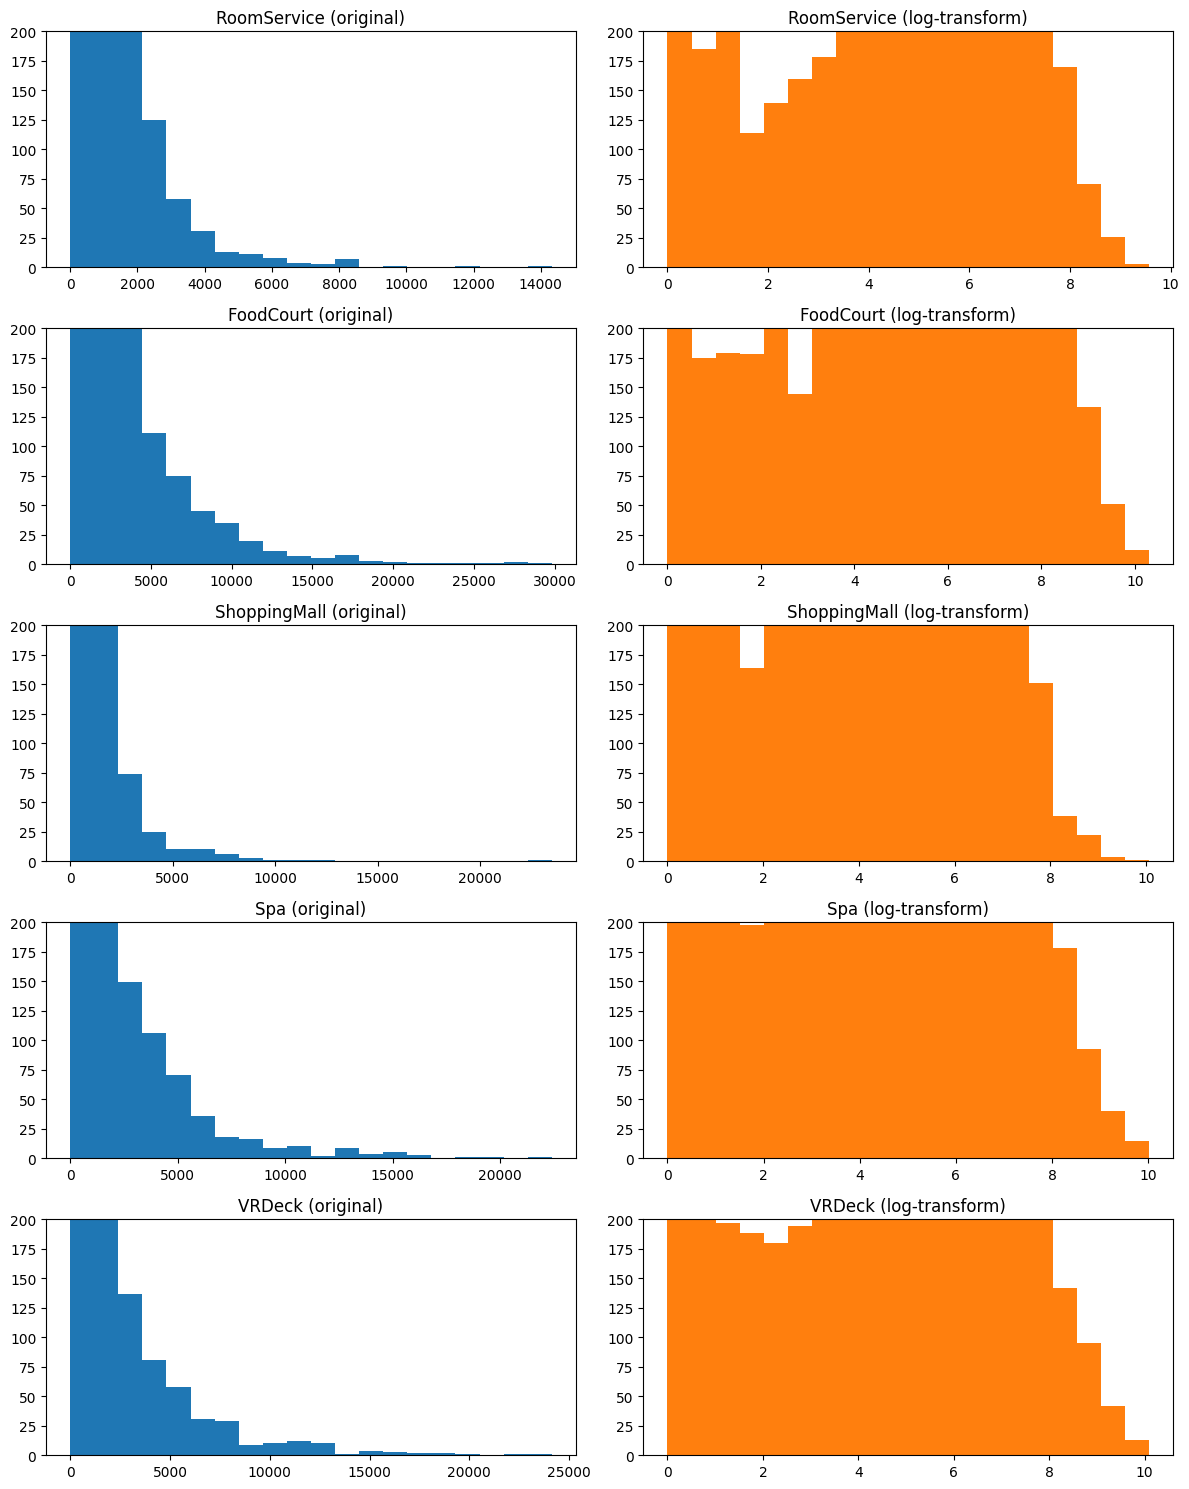

In [25]:
import matplotlib.pyplot as plt
import numpy as np

columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
num_plots = len(columns)

fig, axes = plt.subplots(num_plots, 2, figsize=(12, num_plots*3))

for i, col in enumerate(columns):
    axes[i, 0].hist(df2[col], bins=20)
    axes[i, 0].set_ylim([0, 200])
    axes[i, 0].set_title(f'{col} (original)')

    axes[i, 1].hist(np.log1p(df2[col]), bins=20, color='C1')
    axes[i, 1].set_ylim([0, 200])
    axes[i, 1].set_title(f'{col} (log-transform)')

fig.tight_layout()
plt.show()


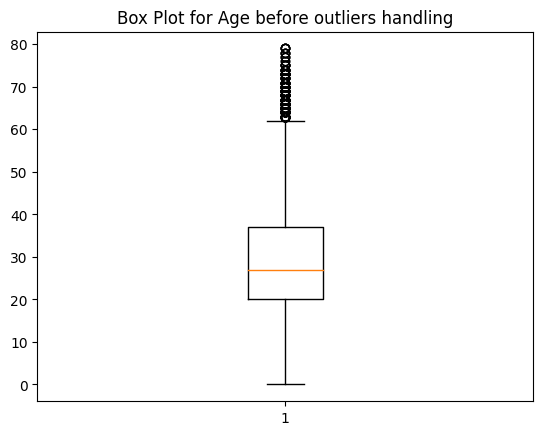

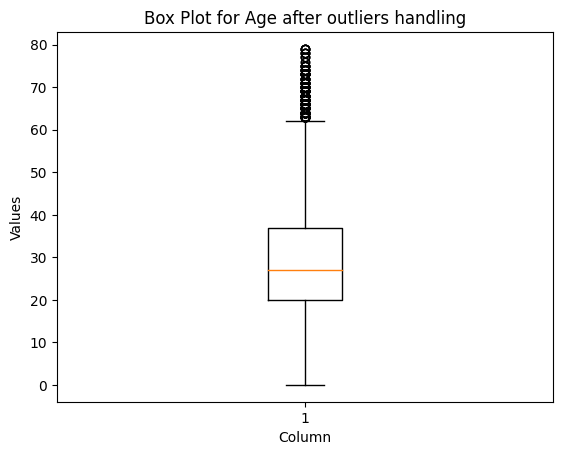

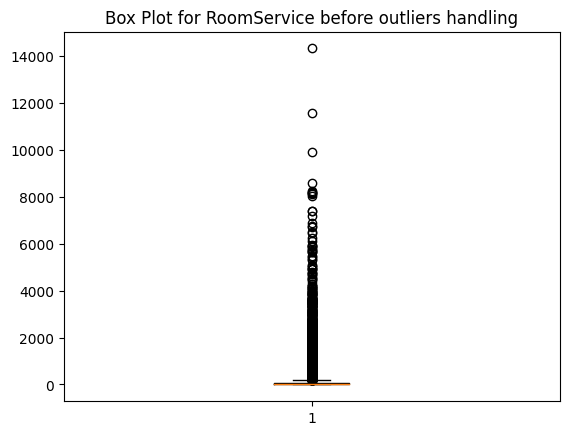

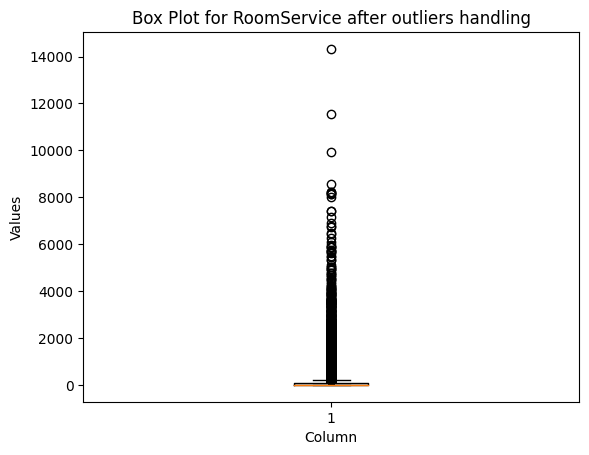

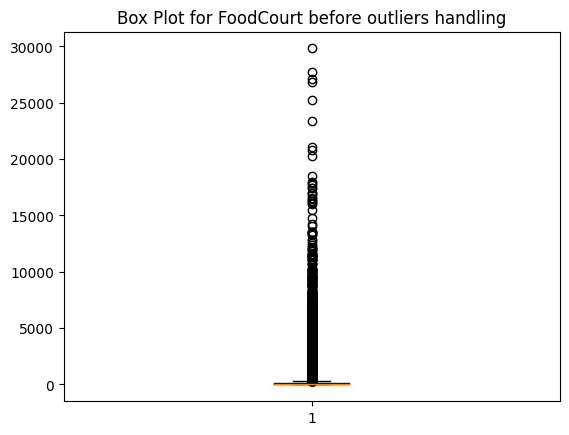

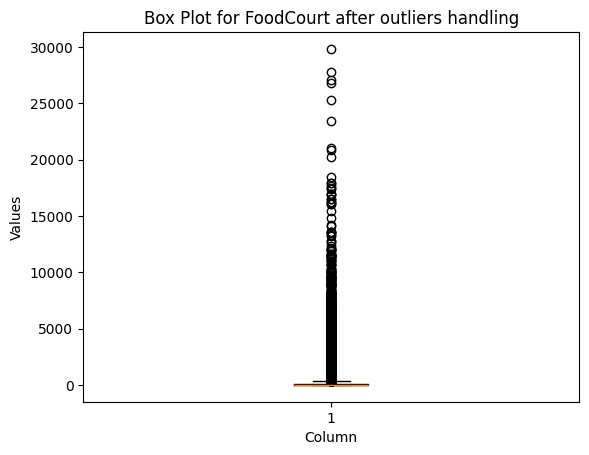

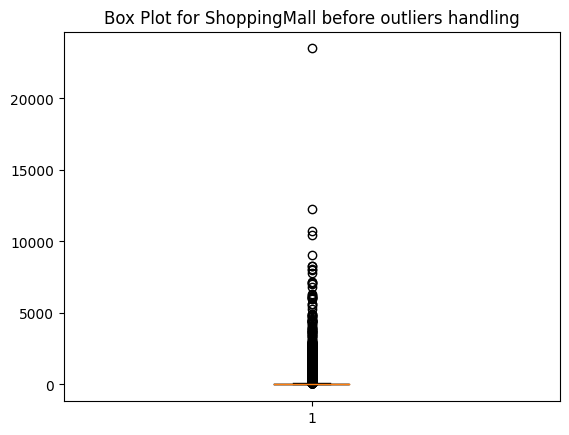

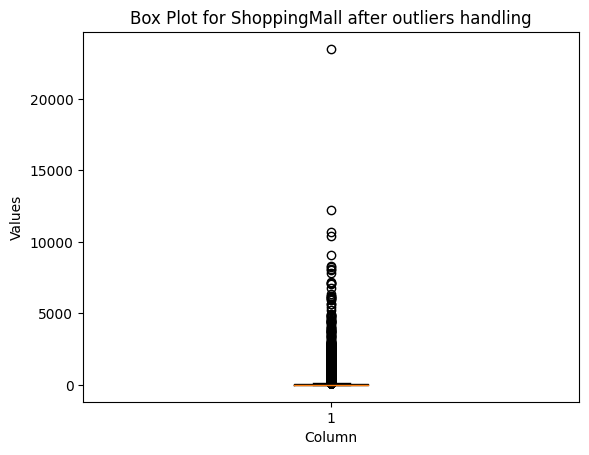

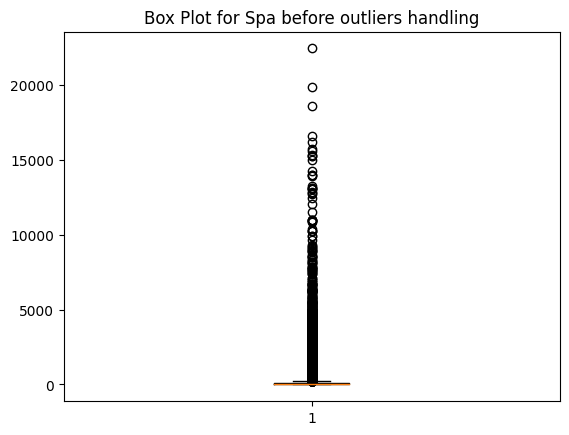

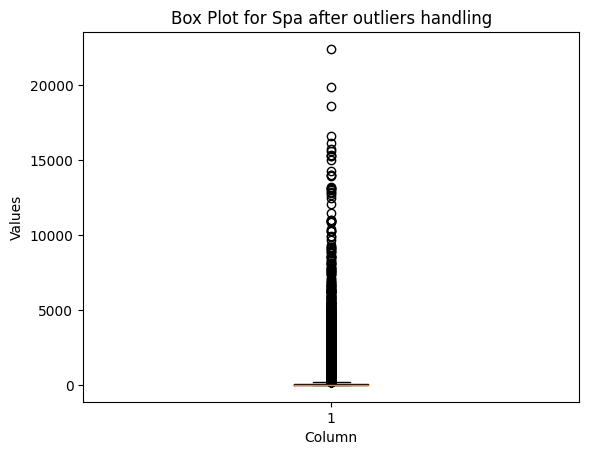

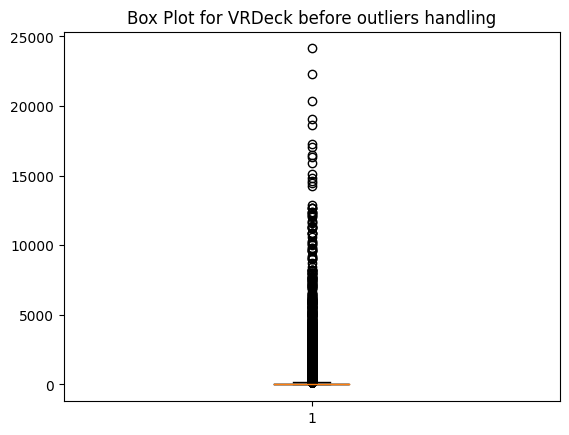

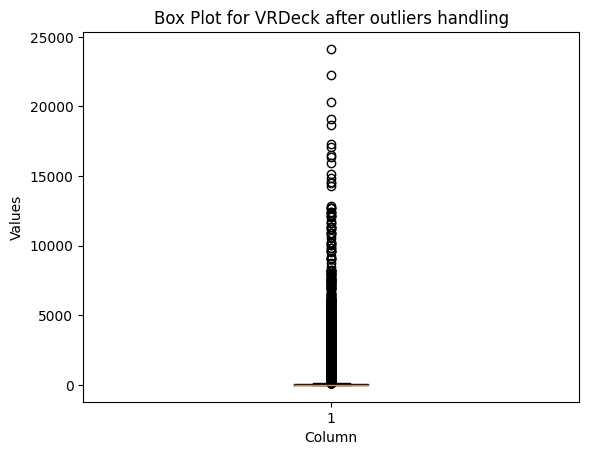

In [27]:
for column in numeric_columnss:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

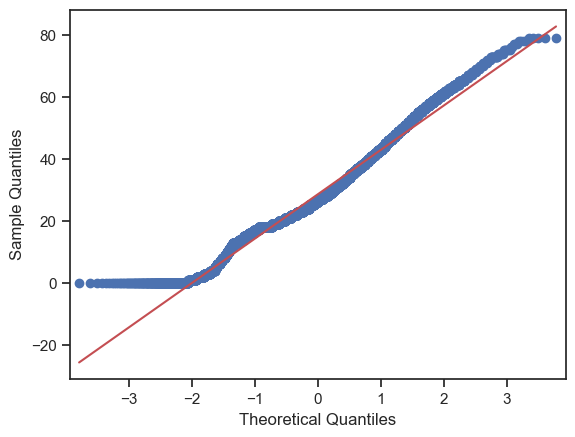

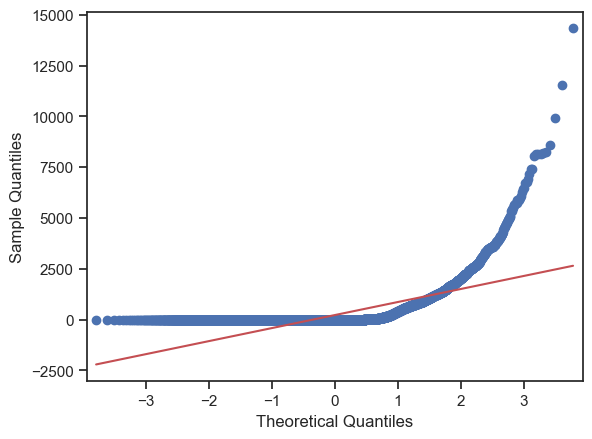

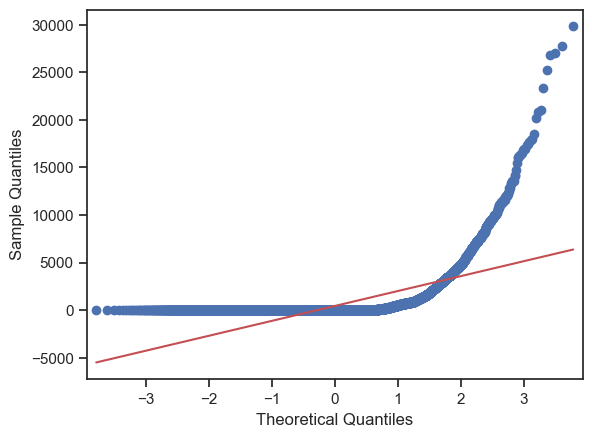

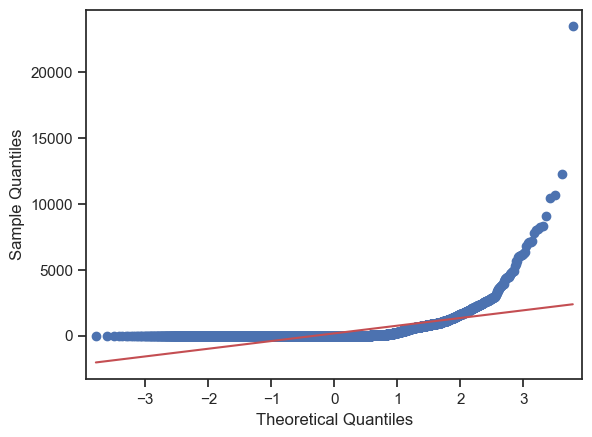

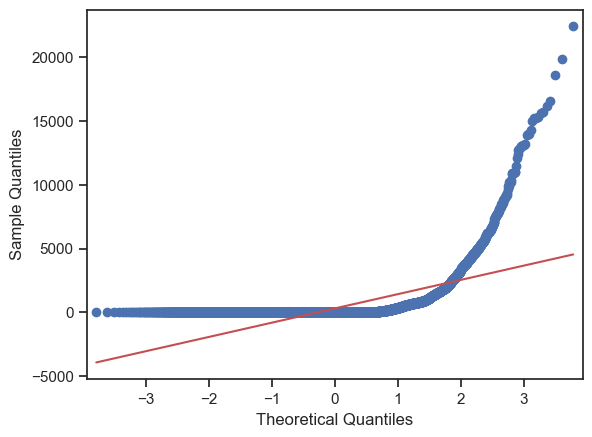

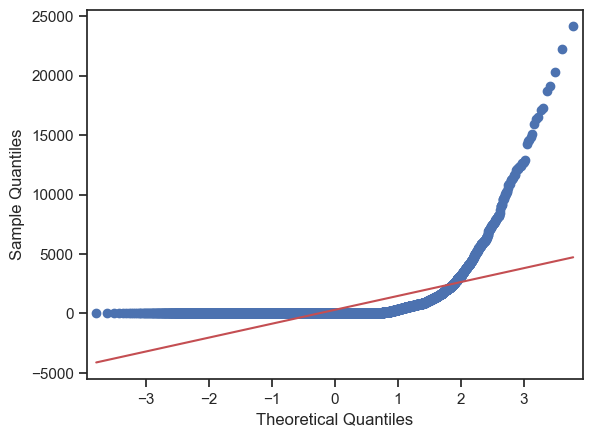

In [380]:
import scipy.stats as stats
import statsmodels.api as sm

for column in numeric_columnss:
    sm.qqplot(df2[column],line='s')
    plt.show()

In [28]:
numeric_columnss

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [29]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [30]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[columns])

normalized_df = pd.DataFrame(normalized_data, columns=columns)


In [31]:
df["PassengerId"] = df["PassengerId"].astype(int)

In [442]:
"""df['Transported'] = df['Transported'].astype(int)
df["Transported"] = df["Transported"].map({"True": 1, "False": 0})"""




In [424]:
"""
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])"""

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['HomePlanet'] = label_encoder.fit_transform(df['HomePlanet'])
df['CryoSleep'] = label_encoder.fit_transform(df['CryoSleep'])
df['VIP'] = label_encoder.fit_transform(df['VIP'])
df['Transported'] = label_encoder.fit_transform(df['Transported'])
df['Destination'] = label_encoder.fit_transform(df['Destination'])




In [37]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,101,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,201,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,301,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,302,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,401,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [38]:
X = df.drop('Transported', axis=1)  # Features (all columns except 'Transported')
y = df['Transported']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
columns = df.columns
print(columns)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [519]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# CatBoost sınıflandırıcı modelini oluşturma ve eğitme
model = CatBoostClassifier()
model.fit(X_train, y_train, cat_features=[1])

# Test verilerini kullanarak tahmin yapma
y_pred = model.predict(X_test)

# Modelin doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Model doğruluğu:", accuracy)




Learning rate set to 0.027976
0:	learn: 0.6841732	total: 212ms	remaining: 3m 31s
1:	learn: 0.6752728	total: 265ms	remaining: 2m 12s
2:	learn: 0.6671315	total: 316ms	remaining: 1m 45s
3:	learn: 0.6599281	total: 359ms	remaining: 1m 29s
4:	learn: 0.6539363	total: 399ms	remaining: 1m 19s
5:	learn: 0.6483056	total: 447ms	remaining: 1m 13s
6:	learn: 0.6424305	total: 496ms	remaining: 1m 10s
7:	learn: 0.6363878	total: 546ms	remaining: 1m 7s
8:	learn: 0.6307341	total: 590ms	remaining: 1m 4s
9:	learn: 0.6251678	total: 633ms	remaining: 1m 2s
10:	learn: 0.6201693	total: 684ms	remaining: 1m 1s
11:	learn: 0.6150129	total: 743ms	remaining: 1m 1s
12:	learn: 0.6107270	total: 798ms	remaining: 1m
13:	learn: 0.6057864	total: 849ms	remaining: 59.8s
14:	learn: 0.6020080	total: 901ms	remaining: 59.1s
15:	learn: 0.5983653	total: 959ms	remaining: 59s
16:	learn: 0.5945064	total: 1.01s	remaining: 58.4s
17:	learn: 0.5910519	total: 1.06s	remaining: 57.9s
18:	learn: 0.5874833	total: 1.11s	remaining: 57.4s
19:	learn

KeyboardInterrupt: 

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_score = logreg.score(X_test, y_test)


In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


rand_forest = RandomForestClassifier()

rand_forest.fit(X_train,y_train)
rand_forest_pred_score =rand_forest.score(X_test,y_test)

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [46]:
grad_boosting = GradientBoostingClassifier()
grad_boosting.fit(X_train,y_train)
grad_boosting_pred_score = grad_boosting.score(X_test,y_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tahminleri yapmak için eğitilen modelleri kullanalım
y_pred_logreg = logreg.predict(X)
y_pred_gradboost = grad_boosting.predict(X)
y_pred_rf = rand_forest.predict(X)
y_pred_svc = svc.predict(X)

# Doğruluk (Accuracy) hesaplaması
accuracy_logreg = accuracy_score(y, y_pred_logreg)
accuracy_gradboost = accuracy_score(y, y_pred_gradboost)
accuracy_rf = accuracy_score(y, y_pred_rf)
accuracy_svc= accuracy_score(y, y_pred_svc)

# Hassasiyet (Precision) hesaplaması
precision_logreg = precision_score(y, y_pred_logreg)
precision_gradboost = precision_score(y, y_pred_gradboost)
precision_rf = precision_score(y, y_pred_rf)
precision_svc = precision_score(y, y_pred_svc)

# Geri Çağırma (Recall) hesaplaması
recall_logreg = recall_score(y, y_pred_logreg)
recall_grad_boost = recall_score(y, y_pred_gradboost)
recall_rf = recall_score(y, y_pred_rf)
recall_svc = recall_score(y, y_pred_svc)

# F1 skoru hesaplaması
f1_logreg = f1_score(y, y_pred_logreg)
f1_gradboost = f1_score(y, y_pred_gradboost)
f1_rf = f1_score(y, y_pred_rf)
f1_svc = f1_score(y, y_pred_svc)
# Sonuçları gösterelim
print("Logistic Regression:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print()

print("Decision Trees:")
print("Accuracy:", accuracy_gradboost)
print("Precision:", precision_gradboost)
print("Recall:", recall_grad_boost)
print("F1 Score:", f1_gradboost)
print()

print("Random Forests:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print()

print("Support Vector Machines:")
print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1 Score:", f1_svc)



Logistic Regression:
Accuracy: 0.6658442559753277
Precision: 0.5186125211505922
Recall: 0.14001827318410234
F1 Score: 0.22050359712230216

Decision Trees:
Accuracy: 0.7404780262143408
Precision: 0.6503267973856209
Recall: 0.5
F1 Score: 0.5653409090909092

Random Forests:
Accuracy: 0.941017733230532
Precision: 0.9287918347970567
Recall: 0.8937871174052079
F1 Score: 0.9109533232452567

Support Vector Machines:
Accuracy: 0.6624518118735544
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the algorithm (e.g., Logistic Regression)
algorithm = LogisticRegression()

# Train the model on the training dataset
algorithm.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = algorithm.predict(X_test)

# Evaluate the model's performance using suitable metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# If necessary, perform hyperparameter tuning using GridSearchCV
# Define the hyperparameters to tune and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(algorithm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Retrain the model with the best hyperparameters
best_algorithm = LogisticRegression(**best_params)
best_algorithm.fit(X_train, y_train)

# Evaluate the performance of the model with the best hyperparameters
y_pred_best = best_algorithm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Model Performance:
Accuracy: 0.6622976098689283
Precision: 0.5267857142857143
Recall: 0.13288288288288289
F1 Score: 0.21223021582733811


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\admin\AppData\Local\Programs\Python\

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Model Performance:
Accuracy: 0.6622976098689283
Precision: 0.5267857142857143
Recall: 0.13288288288288289
F1 Score: 0.21223021582733811


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing dataset
y_pred = algorithm.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance on Testing Dataset:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Check for overfitting or underfitting
# Make predictions on the training dataset
y_pred_train = algorithm.predict(X_train)

# Calculate the performance metrics on the training dataset
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print("Model Performance on Training Dataset:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)


Model Performance on Testing Dataset:
Accuracy: 0.6622976098689283
Precision: 0.5267857142857143
Recall: 0.13288288288288289
F1 Score: 0.21223021582733811
Model Performance on Training Dataset:
Accuracy: 0.6667309175019275
Precision: 0.5167014613778705
Recall: 0.14183381088825214
F1 Score: 0.22257194244604317


In [56]:
from sklearn.model_selection import GridSearchCV

# Define the algorithm (e.g., Random Forest)
algorithm = RandomForestClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(algorithm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Retrain the model with the best hyperparameters
best_algorithm = RandomForestClassifier(**best_params)
best_algorithm.fit(X_train, y_train)

# Evaluate the performance of the model with the best hyperparameters
y_pred_best = best_algorithm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Best Model Performance:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Model Performance:
Accuracy: 0.7212798766383963
Precision: 0.6267281105990783
Recall: 0.4594594594594595
F1 Score: 0.5302144249512671
